<a href="https://colab.research.google.com/github/Nils1511/EE769/blob/main/Final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Analysis and Prediction

##Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Taking Microsoft stock dataset
data = pd.read_csv('MSFT.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059891,58435200


In [ ]:
# Choosing to model and predict Closing price of stock
df = data[['Date', 'Close']]
df.head(3)

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826


Text(0, 0.5, 'Close Price')

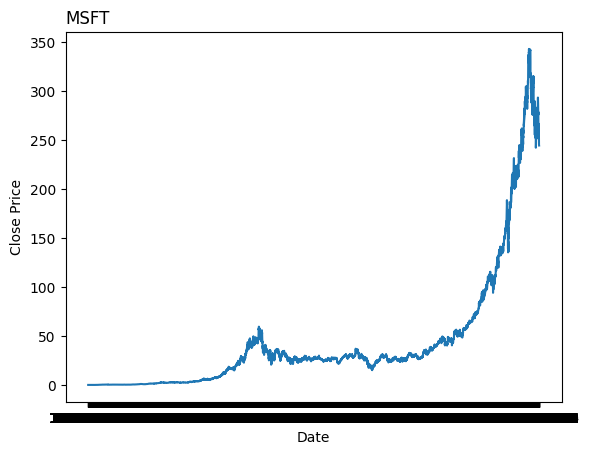

In [ ]:
# Without string to datetime conversion
plt.plot(df['Date'], df['Close'])
plt.title("MSFT", loc = 'left')
plt.xlabel("Date")
plt.ylabel("Close Price")

In [ ]:
import datetime
# To split str into date , month , year
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.date(year=year, month=month, day=day)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)

<ipython-input-8-82fc7f804c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [ ]:
df['Date']

0       1986-03-14
1       1986-03-17
2       1986-03-18
3       1986-03-19
4       1986-03-20
           ...    
9199    2022-09-13
9200    2022-09-14
9201    2022-09-15
9202    2022-09-16
9203    2022-09-19
Name: Date, Length: 9204, dtype: object

Text(0, 0.5, 'Close Price')

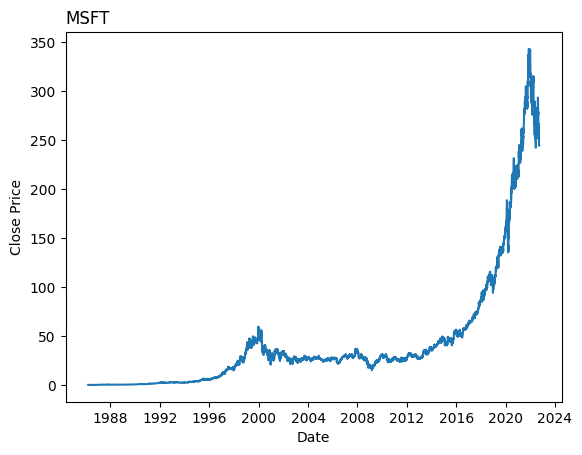

In [ ]:
# With Date to string conversion
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'])
plt.title("MSFT", loc = 'left')
plt.xlabel("Date")
plt.ylabel("Close Price")

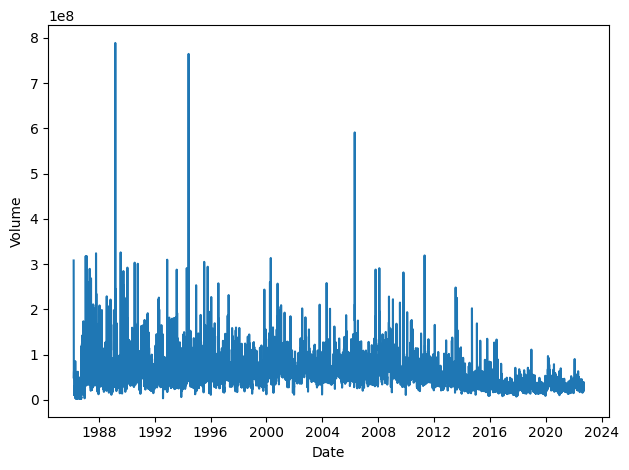

In [ ]:
plt.plot(df['Date'],data['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.tight_layout()

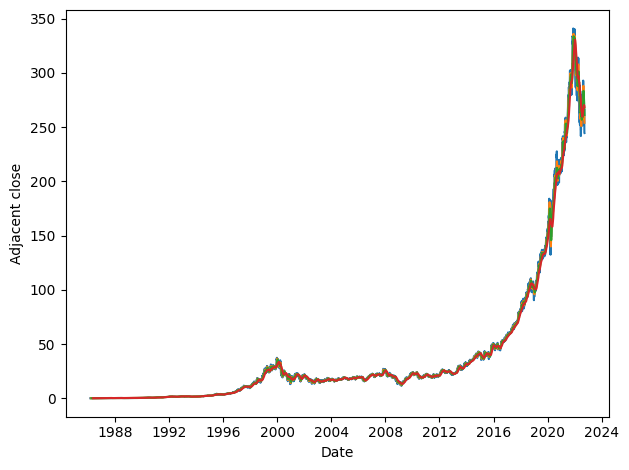

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data[column_name] = data['Adj Close'].rolling(ma).mean()

data1 = data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']]
plt.plot(df['Date'],data1)
plt.ylabel('Adjacent close')
plt.xlabel('Date')
plt.tight_layout()

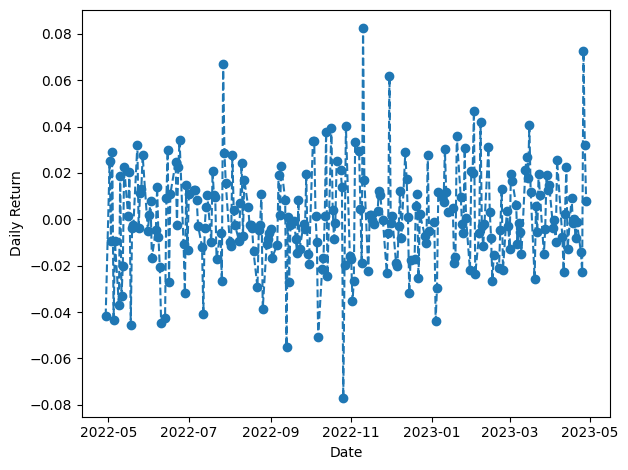

In [ ]:
data['Daily Return'] = data['Adj Close'].pct_change()

data2 = data['Daily Return']
plt.plot(df['Date'],data2,'o',linestyle='--')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.tight_layout()


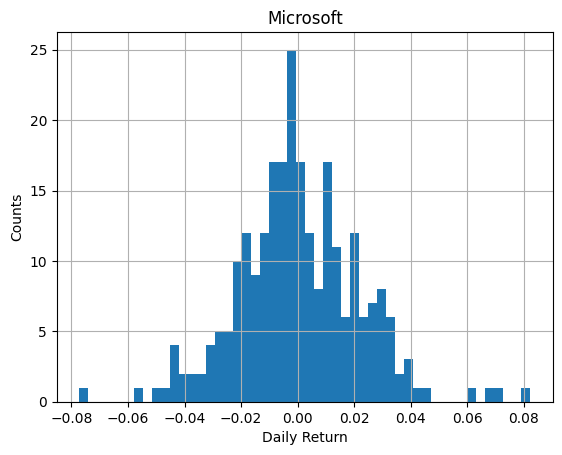

In [ ]:
for i, company in enumerate(data, 1):
    plt.plot()
    data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'Microsoft')

#Prediction

In [ ]:
df.index = df.pop('Date')
df.tail(3)

,Close
Date,
2022-04-28,289.630005
2022-04-29,277.519989
2022-05-02,284.470001


In [ ]:
import numpy as np
# Split dataframe to date
def df_split(dataframe, first_date_str, last_date_str):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)
  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(4)
    values = df_subset['Close'].to_numpy()                  # Convert
    x, y = values[:-1], values[-1]
    print(values)
    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_date_str = str(next_week.head(2).tail(1).index.values[0])
    year, month, day = next_date_str.split('-')
    next_date = datetime.date(day=int(day), month=int(month), year=int(year))

    if target_date == last_date:
      break
    target_date = next_date

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, 3):
    X[:, i]
    ret_df[f'Target-{3-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

In [ ]:
def Get_date_x_y(splitted_df):
  df_as_np = splitted_df.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


In [ ]:
splitted_df = df_split(df,'2022-05-03', '2023-04-28')
splitted_df

TypeError: ignored

In [ ]:
dates, X, y =  Get_date_x_y(splitted_df)
dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

In [ ]:
# Train , Validate and test  Split of Date , X (Middle matrix ) and Y (target)
date_split_80 = int(0.8*len(dates))
X_split_80 = int(0.8*len(X))
Y_split_80 = int(0.8*len(y))

date_split_90 = int(0.9*len(dates))
X_split_90 = int(0.9*len(X))
Y_split_90 = int(0.9*len(y))

dates_train, X_train, y_train = dates[:date_split_80], X[:X_split_80], y[:Y_split_80]
dates_val, X_val, y_val = dates[date_split_80:date_split_90], X[X_split_80:X_split_90], y[Y_split_80:Y_split_90]
dates_test, X_test, y_test = dates[date_split_90:], X[X_split_90:], y[Y_split_90:]



In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 167ms/step - loss: 64509.8047 - mean_absolute_error: 253.4224 - val_loss: 67189.7969 - val_mean_absolute_error: 259.0139
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 64438.2852 - mean_absolute_error: 253.2818 - val_loss: 67085.9062 - val_mean_absolute_error: 258.8133
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 64295.5078 - mean_absolute_error: 252.9990 - val_loss: 66837.4922 - val_mean_absolute_error: 258.3330
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 63947.0312 - mean_absolute_error: 252.3077 - val_loss: 66250.8359 - val_mean_absolute_error: 257.1950
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 63166.1875 - mean_absolute_error: 250.7553 - val_loss: 64985.0586 - val_mean_absolute_error: 254.7222
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 61481.6953 - mean_absolute_error: 247.3793 - val_loss: 62

7/7 [==============================] - 1s 3ms/step


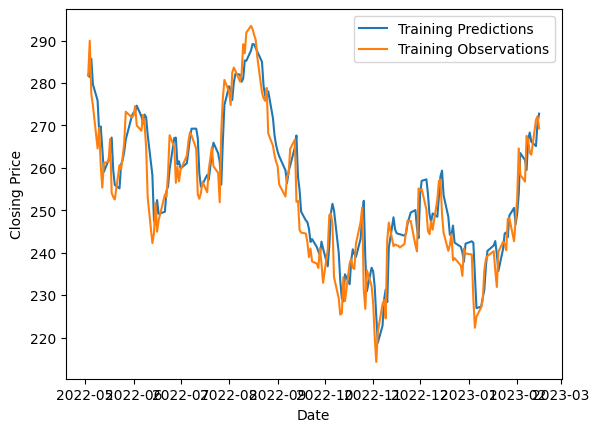

In [ ]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

1/1 [==============================] - 0s 24ms/step


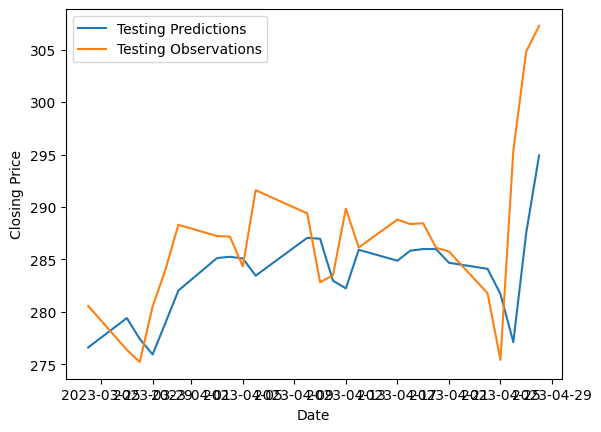

In [ ]:
test_predictions = model.predict(X_test).flatten()
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()